# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [9]:
print(lat_lngs)

In [10]:
cities

['bluff',
 'cape town',
 'jaciara',
 'mudyuga',
 'saint george',
 'busselton',
 'rikitea',
 'ushuaia',
 'ponta do sol',
 'moose factory',
 'punta arenas',
 'cherskiy',
 'vaini',
 'butaritari',
 'ribeira grande',
 'kapaa',
 'jamestown',
 'sidi ali',
 'san cristobal',
 'albany',
 'new norfolk',
 'seydi',
 'barrow',
 'hermanus',
 'labuhan',
 'hobyo',
 'sur',
 'upernavik',
 'praia',
 'castro',
 'tasiilaq',
 'bilma',
 'cabo san lucas',
 'atuona',
 'thompson',
 'sitka',
 'khandyga',
 'yellowknife',
 'khatanga',
 'san patricio',
 'prince rupert',
 'koubia',
 'pangnirtung',
 'attawapiskat',
 'mataura',
 'apache junction',
 'wasaga beach',
 'martapura',
 'dunedin',
 'kurtalan',
 'treia',
 'paamiut',
 'port alfred',
 'avarua',
 'pochutla',
 'lavrentiya',
 'bethel',
 'chuy',
 'bosaso',
 'constitucion',
 'ozgon',
 'puerto rondon',
 'almaty',
 'kaitangata',
 'pontianak',
 'yatou',
 'guilin',
 'port hedland',
 'morondava',
 'faanui',
 'pacific grove',
 'saint-francois',
 'kajaani',
 'maceio',
 'arra

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Creating a dataframe for cities data

cities_df = pd.DataFrame({'City':pd.Series([], dtype='str')})

In [30]:
# Adding cities data to the dataframe

cities_df['City'] = np.array(cities)
cities_df.head()

,City
0,perth
1,samarai
2,avarua
3,rikitea
4,cherskiy


In [31]:
# Creating a new dataframe to hold the weather data from API calls

weather_df = pd.DataFrame({'City':pd.Series([], dtype='str'),
                   'Lat':pd.Series([], dtype='float'),
                   'Lng':pd.Series([], dtype='float'),
                    'Max_Temp':pd.Series([], dtype='float'),
                    'Humidity':pd.Series([], dtype='int'),
                    'Cloudiness':pd.Series([], dtype='int'),
                    'Wind_Speed':pd.Series([], dtype='float'),
                    'Country':pd.Series([], dtype='str'),
                    'Date':pd.Series([], dtype='str')})
print (weather_df)
weather_df.dtypes

Empty DataFrame
Columns: [City, Lat, Lng, Max_Temp, Humidity, Cloudiness, Wind_Speed, Country, Date]
Index: []


City           object
Lat           float64
Lng           float64
Max_Temp      float64
Humidity        int32
Cloudiness      int32
Wind_Speed    float64
Country        object
Date           object
dtype: object

In [34]:
# getting the weather for each city in the 'City' in Fahrenheit in the dataframe

units = 'Imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"

# Loop through the weather_pd and run weather search for each city
# for index, row in cities_df[:5].iterrows():


for index, row in cities_df.iterrows():
    
    city = cities[index]
    #print(city)
    
    # Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
  
    # Run request
    response = requests.get(query_url + city).json()
    #print(len(response))
   
    try: 
        
        weather_df.loc[index, "Lat"] = response['coord']['lat']
        weather_df.loc[index, "Lng"] = response['coord']['lon']
        weather_df.loc[index, "Max_Temp"] = response['main']['temp_max']
        weather_df.loc[index, "Humidity"] = response['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_df.loc[index, "Wind_Speed"] = response['wind']['speed']
        weather_df.loc[index, "Country"] = response['sys']['country']
        weather_df.loc[index, "Date"] = response['dt']
        weather_df.loc[index, "City"] = cities[index]
        id_num = response['id']
        
         # Add a one second interval between queries to stay within API query limits
        time.sleep(1) 
        
    except KeyError:
        
        print(f"City: {city} with city id: {id_num} is not found!" )
       
 


City: barentsburg with city id: 162627 is not found!
City: sentyabrskiy with city id: 162627 is not found!
City: mys shmidta with city id: 162627 is not found!
City: illoqqortoormiut with city id: 5282297 is not found!
City: taolanaro with city id: 4047434 is not found!
City: karkaralinsk with city id: 5866583 is not found!
City: vaitupu with city id: 3382160 is not found!
City: amderma with city id: 780687 is not found!
City: grand river south east with city id: 2208248 is not found!
City: attawapiskat with city id: 1283711 is not found!
City: pousat with city id: 4034551 is not found!
City: marcona with city id: 981827 is not found!
City: belushya guba with city id: 3386213 is not found!
City: samusu with city id: 779622 is not found!
City: nguiu with city id: 1735106 is not found!
City: canitas with city id: 1717738 is not found!
City: tumannyy with city id: 1717738 is not found!
City: sataua with city id: 2272491 is not found!
City: kazalinsk with city id: 933995 is not found!
City

In [35]:
weather_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,perth,-31.9333,115.8333,60.78,62.0,0.0,14.83,AU,1620836410
1,samarai,-10.6167,150.6667,80.83,82.0,57.0,6.71,PG,1620836479
2,avarua,-21.2078,-159.7750,69.69,100.0,90.0,3.44,CK,1620836433
3,rikitea,-23.1203,-134.9692,77.70,77.0,21.0,21.00,PF,1620836481
4,cherskiy,68.7500,161.3000,8.31,98.0,97.0,4.12,RU,1620836483


In [36]:
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max_Temp      float64
Humidity      float64
Cloudiness    float64
Wind_Speed    float64
Country        object
Date           object
dtype: object

In [37]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 601
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        558 non-null    object 
 1   Lat         558 non-null    float64
 2   Lng         558 non-null    float64
 3   Max_Temp    558 non-null    float64
 4   Humidity    558 non-null    float64
 5   Cloudiness  558 non-null    float64
 6   Wind_Speed  558 non-null    float64
 7   Country     558 non-null    object 
 8   Date        558 non-null    object 
dtypes: float64(6), object(3)
memory usage: 63.6+ KB


In [38]:
weather_df = weather_df.dropna()
weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,perth,-31.9333,115.8333,60.78,62.0,0.0,14.83,AU,1620836410
1,samarai,-10.6167,150.6667,80.83,82.0,57.0,6.71,PG,1620836479
2,avarua,-21.2078,-159.7750,69.69,100.0,90.0,3.44,CK,1620836433
3,rikitea,-23.1203,-134.9692,77.70,77.0,21.0,21.00,PF,1620836481
4,cherskiy,68.7500,161.3000,8.31,98.0,97.0,4.12,RU,1620836483
...,...,...,...,...,...,...,...,...,...
597,kudahuvadhoo,2.6708,72.8944,80.49,85.0,100.0,26.44,MV,1620837178
598,rondonopolis,-16.4708,-54.6356,91.45,31.0,6.0,8.57,BR,1620837179
599,kainantu,-6.2887,145.8655,59.95,97.0,94.0,1.77,PG,1620837181
600,saint-pierre,-21.3393,55.4781,76.44,78.0,0.0,14.97,RE,1620837182


In [39]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 601
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        558 non-null    object 
 1   Lat         558 non-null    float64
 2   Lng         558 non-null    float64
 3   Max_Temp    558 non-null    float64
 4   Humidity    558 non-null    float64
 5   Cloudiness  558 non-null    float64
 6   Wind_Speed  558 non-null    float64
 7   Country     558 non-null    object 
 8   Date        558 non-null    object 
dtypes: float64(6), object(3)
memory usage: 43.6+ KB


In [40]:
# Resetting the index so that we are able to retieve the weight column
weather_df = weather_df.reset_index()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
# Exporting the data into csv file and saving for next use
weather_df.to_csv(('../resources/weather_output.csv'), encoding='utf-8')

In [47]:
# Importing the api weather saved in output csv file 

api_weather_df = pd.read_csv('../resources/weather_output.csv')
api_weather_df.head()

,Unnamed: 0,index,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,0,0,perth,-31.9333,115.8333,60.78,62.0,0.0,14.83,AU,1620836410
1,1,1,samarai,-10.6167,150.6667,80.83,82.0,57.0,6.71,PG,1620836479
2,2,2,avarua,-21.2078,-159.7750,69.69,100.0,90.0,3.44,CK,1620836433
3,3,3,rikitea,-23.1203,-134.9692,77.70,77.0,21.0,21.00,PF,1620836481
4,4,4,cherskiy,68.7500,161.3000,8.31,98.0,97.0,4.12,RU,1620836483


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = api_weather_df.drop(api_weather_df[api_weather_df['Humidity'] > 100].index, inplace = False)
clean_city_data.head()

,Unnamed: 0,index,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,0,0,perth,-31.9333,115.8333,60.78,62.0,0.0,14.83,AU,1620836410
1,1,1,samarai,-10.6167,150.6667,80.83,82.0,57.0,6.71,PG,1620836479
2,2,2,avarua,-21.2078,-159.7750,69.69,100.0,90.0,3.44,CK,1620836433
3,3,3,rikitea,-23.1203,-134.9692,77.70,77.0,21.0,21.00,PF,1620836481
4,4,4,cherskiy,68.7500,161.3000,8.31,98.0,97.0,4.12,RU,1620836483


In [49]:
# Narrow down the DataFrame to find your ideal weather condition. For example:
# A max temperature lower than 80 degrees but higher than 70
# Wind speed less than 10 mph.
# Zero cloudiness.


In [50]:
# Extracting the ideal weather based on conditions mentioned above

ideal_weather_df = api_weather_df.loc[(api_weather_df['Max_Temp'] < 80) & (api_weather_df['Max_Temp'] > 70) & (api_weather_df['Wind_Speed'] < 10) & (api_weather_df['Cloudiness'] == 0)]
ideal_weather_df


,Unnamed: 0,index,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
143,143,155,kumluca,36.3703,30.2869,71.85,63.0,0.0,4.59,TR,1620836658
235,235,255,inhambane,-23.8650,35.3833,73.29,73.0,0.0,0.00,MZ,1620836774
287,287,312,maltahohe,-24.8333,16.9833,73.96,17.0,0.0,8.68,NaN,1620836840
370,370,400,saurimo,-9.6608,20.3916,71.82,57.0,0.0,3.44,AO,1620836883
498,498,535,bukama,-9.2000,25.8500,70.48,60.0,0.0,2.59,CD,1620837108
521,521,560,richards bay,-28.7830,32.0377,70.27,86.0,0.0,8.34,ZA,1620836972


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


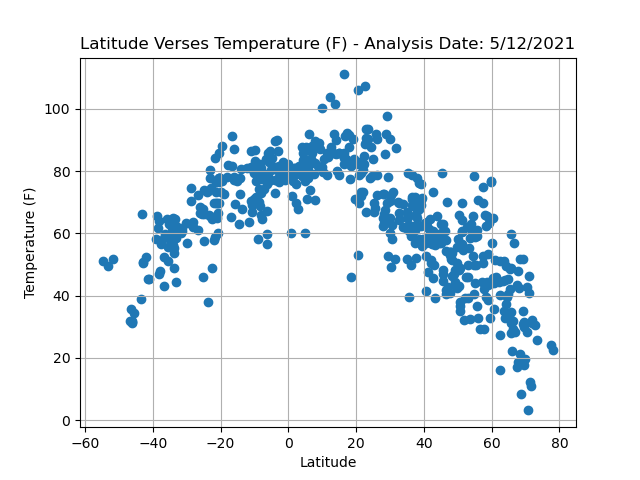

In [51]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Create a Scatter Plot for vs latitude vs. temperature 

x_values = api_weather_df['Lat']
y_values = api_weather_df['Max_Temp']

plt.scatter(x_values,y_values)

plt.title("Latitude Verses Temperature (F) - Analysis Date: 5/12/2021")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.show()
plt.grid()

plt.savefig('../resources/temp_lat.png')

In [52]:
# Observable Trend: The api_weather dataset shows that the "Temperature" increases as the "Latitude" increases from negative values to zero, resulting in positive relationship
# The "Temperature" rises maximum value at "Latitude" of data point 20.
# As the "Latitude" decreases from data point 20, the "Temperature" decreses, showing a negative relationship.

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


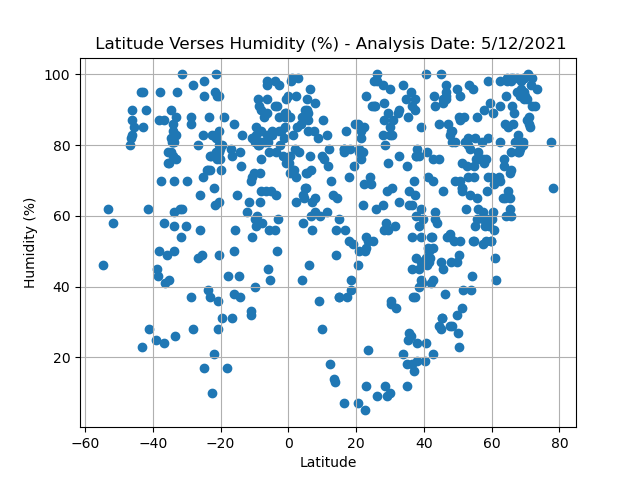

In [53]:
# Create a Scatter Plot for latitude vs. Humidity
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt

x_values = api_weather_df['Lat']
y_values = api_weather_df['Humidity']

plt.scatter(x_values,y_values)

plt.title(" Latitude Verses Humidity (%) - Analysis Date: 5/12/2021")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()
plt.grid()

plt.savefig('../resources/humidity_lat.png')

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


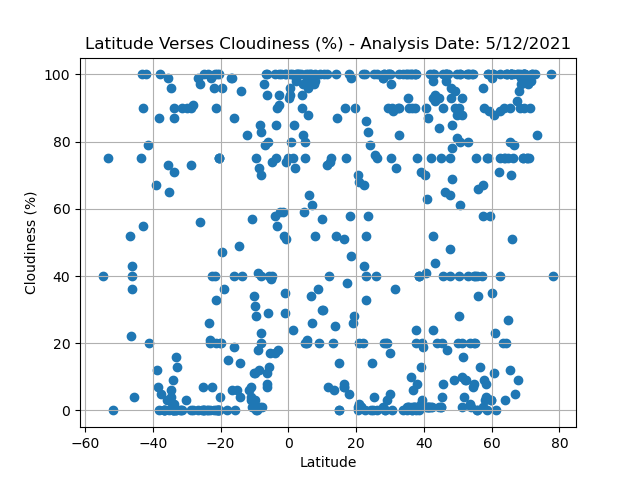

In [54]:
# Create a Scatter Plot for Latitude vs Cloudiness 
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt

x_values = api_weather_df['Lat']
y_values = api_weather_df['Cloudiness']

plt.scatter(x_values,y_values)

plt.title("Latitude Verses Cloudiness (%) - Analysis Date: 5/12/2021")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()
plt.grid()

plt.savefig('../resources/cloud_lat.png')

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


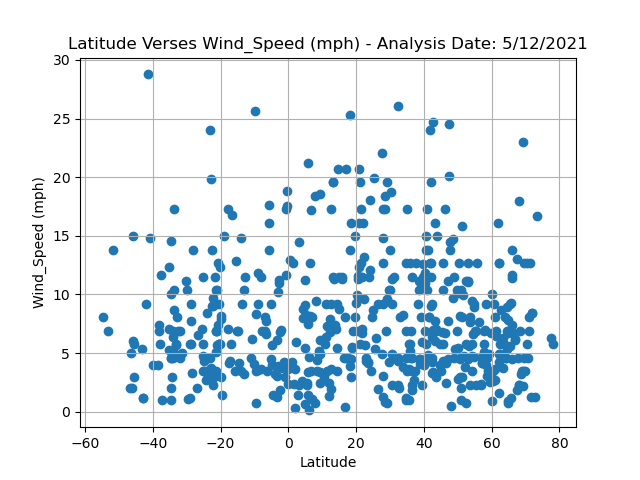

In [54]:
# Create a Scatter Plot for Latitude vs. Wind_Speed
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt

x_values = api_weather_df['Lat']
y_values = api_weather_df['Wind_Speed']

plt.scatter(x_values,y_values)

plt.title("Latitude Verses Wind_Speed (mph) - Analysis Date: 5/12/2021")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')

plt.show()
plt.grid()

plt.savefig('../resources/wind_lat.png')

## Linear Regression

In [55]:
# separating the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 

lat_north_hem_df = api_weather_df[api_weather_df['Lat'] >= 0]
lat_north_hem_df

,Unnamed: 0,index,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
4,4,4,cherskiy,68.7500,161.3000,8.31,98.0,97.0,4.12,RU,1620836483
7,7,7,marinette,45.1000,-87.6307,56.93,47.0,1.0,10.36,US,1620836486
8,8,8,salalah,17.0151,54.0924,84.04,84.0,75.0,8.05,OM,1620836487
9,9,9,san patricio,28.0170,-97.5169,72.82,83.0,99.0,16.22,US,1620836489
10,10,10,yabrud,33.9674,36.6574,69.53,21.0,0.0,3.38,SY,1620836490
...,...,...,...,...,...,...,...,...,...,...,...
547,547,589,portree,57.4129,-6.1942,52.86,76.0,96.0,5.57,GB,1620837170
548,548,591,dudinka,69.4058,86.1778,31.68,99.0,100.0,6.40,RU,1620837172
549,549,592,gbarnga,6.9956,-9.4722,85.78,64.0,61.0,5.28,LR,1620837173
550,550,593,wanxian,30.8039,108.3897,73.17,87.0,89.0,2.84,CN,1620837174


In [56]:
lat_north_hem_df["Lat"]

4      68.7500
7      45.1000
8      17.0151
9      28.0170
10     33.9674
        ...   
547    57.4129
548    69.4058
549     6.9956
550    30.8039
553     2.6708
Name: Lat, Length: 370, dtype: float64

In [57]:
# separating the plots into Southern Hemisphere (less than 0 degrees latitude) 

lat_south_hem_df = api_weather_df[api_weather_df['Lat'] < 0]
lat_south_hem_df

,Unnamed: 0,index,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,0,0,perth,-31.9333,115.8333,60.78,62.0,0.0,14.83,AU,1620836410
1,1,1,samarai,-10.6167,150.6667,80.83,82.0,57.0,6.71,PG,1620836479
2,2,2,avarua,-21.2078,-159.7750,69.69,100.0,90.0,3.44,CK,1620836433
3,3,3,rikitea,-23.1203,-134.9692,77.70,77.0,21.0,21.00,PF,1620836481
5,5,5,porto walter,-8.2686,-72.7439,82.22,72.0,85.0,1.50,BR,1620836484
...,...,...,...,...,...,...,...,...,...,...,...
552,552,596,namibe,-15.1961,12.1522,76.71,66.0,6.0,8.12,AO,1620837177
554,554,598,rondonopolis,-16.4708,-54.6356,91.45,31.0,6.0,8.57,BR,1620837179
555,555,599,kainantu,-6.2887,145.8655,59.95,97.0,94.0,1.77,PG,1620837181
556,556,600,saint-pierre,-21.3393,55.4781,76.44,78.0,0.0,14.97,RE,1620837182


In [58]:
lat_south_hem_df["Lat"]

0     -31.9333
1     -10.6167
2     -21.2078
3     -23.1203
5      -8.2686
        ...   
552   -15.1961
554   -16.4708
555    -6.2887
556   -21.3393
557    -3.4833
Name: Lat, Length: 188, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.81


<IPython.core.display.Javascript object>


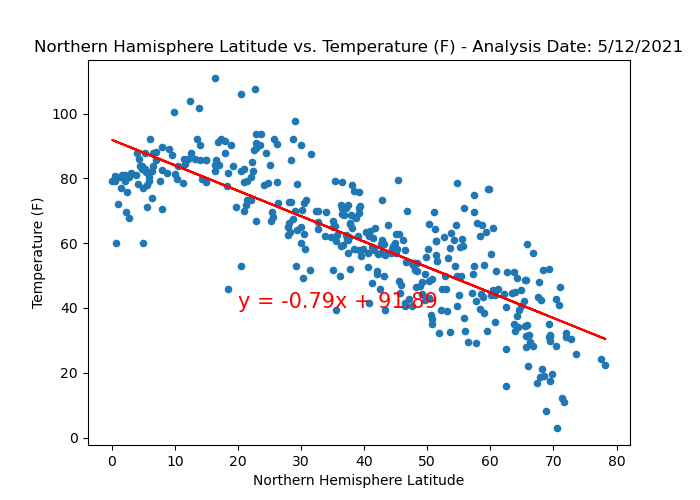

The r-squared is: 0.6616202157281206


In [59]:
# Perform a linear regression on temperature vs. latitude
from scipy import stats

# Print out the r-squared value along with the plot.
x_values = lat_north_hem_df["Lat"]
y_values = lat_north_hem_df["Max_Temp"]

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north_hem_df.plot("Lat", "Max_Temp", kind="scatter", figsize = (7,5))

#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

plt.title("Northern Hamisphere Latitude vs. Temperature (F) - Analysis Date: 5/12/2021")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# The correlation coefficient factor between the 'Northern Hemisphere latitude' (greater than or equal to 0 degrees) and 'Temperature' of -0.85 shows a high negative relationship between the two factors.
# The r_square value of 0.66 shows that the model is able to fit the 60 % of variability of data points and negative relationship between the two factors.



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.78


<IPython.core.display.Javascript object>


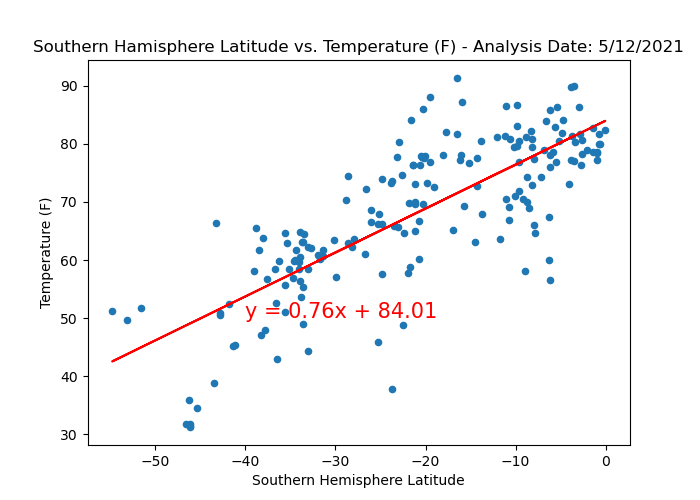

The r-squared is: 0.6107613907620669


In [60]:
# Perform a linear regression on temperature vs. latitude
from scipy import stats

# Print out the r-squared value along with the plot.
x_values = lat_south_hem_df["Lat"]
y_values = lat_south_hem_df["Max_Temp"]

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south_hem_df.plot("Lat", "Max_Temp", kind="scatter", figsize = (7,5))

#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")

plt.title("Southern Hamisphere Latitude vs. Temperature (F) - Analysis Date: 5/12/2021")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# The correlation coefficient factor between the 'Southern Hemisphere latitude' (less than 0 degrees) and 'Temperature' of 0.78 shows a high positve relationship between the two factors.
# The r_square value of 0.61 shows that the model is able to fit the 60 % of variability of data points and positive relationship between the two factors.



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.15


<IPython.core.display.Javascript object>


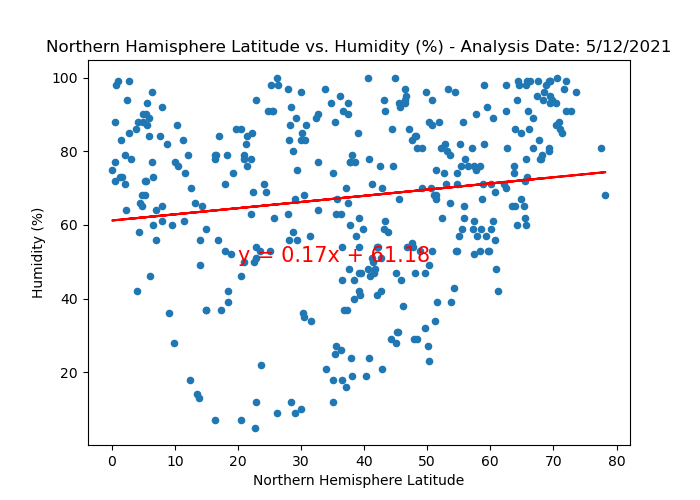

The r-squared is: 0.022761946607868448


In [61]:
# Perform a linear regression on temperature vs. latitude
from scipy import stats

# Print out the r-squared value along with the plot.
x_values = lat_north_hem_df["Lat"]
y_values = lat_north_hem_df["Humidity"]

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north_hem_df.plot("Lat", "Humidity", kind="scatter", figsize = (7,5))

#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.title("Northern Hamisphere Latitude vs. Humidity (%) - Analysis Date: 5/12/2021")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.14


<IPython.core.display.Javascript object>


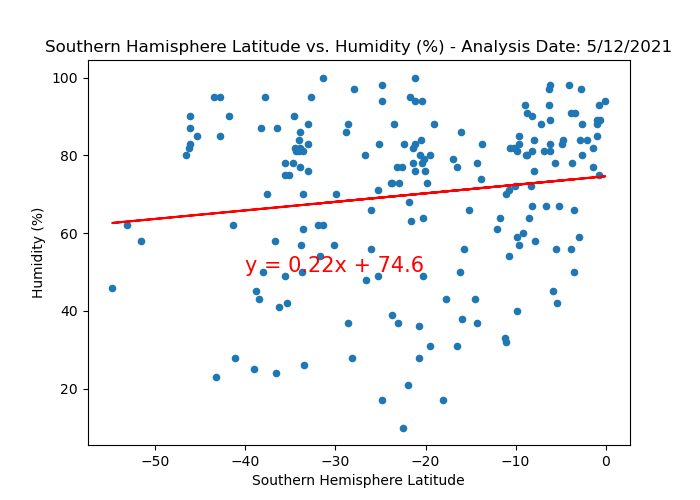

The r-squared is: 0.020539926627484426


In [62]:
# Perform a linear regression on temperature vs. latitude
from scipy import stats

# Print out the r-squared value along with the plot.
x_values = lat_south_hem_df["Lat"]
y_values = lat_south_hem_df["Humidity"]

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south_hem_df.plot("Lat", "Humidity", kind="scatter", figsize = (7,5))

#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")

plt.title("Southern Hamisphere Latitude vs. Humidity (%) - Analysis Date: 5/12/2021")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.04


<IPython.core.display.Javascript object>


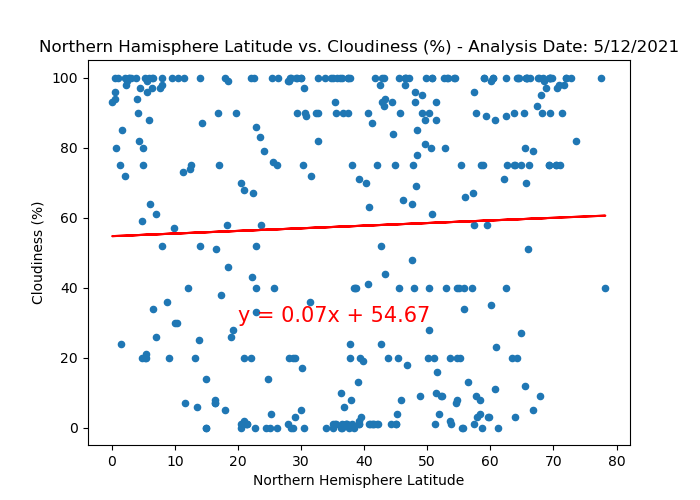

The r-squared is: 0.0015741536530929382


In [63]:
# Perform a linear regression on temperature vs. latitude
from scipy import stats

# Print out the r-squared value along with the plot.
x_values = lat_north_hem_df["Lat"]
y_values = lat_north_hem_df["Cloudiness"]

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north_hem_df.plot("Lat", "Cloudiness", kind="scatter", figsize = (7,5))

#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

plt.title("Northern Hamisphere Latitude vs. Cloudiness (%) - Analysis Date: 5/12/2021")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.14


<IPython.core.display.Javascript object>


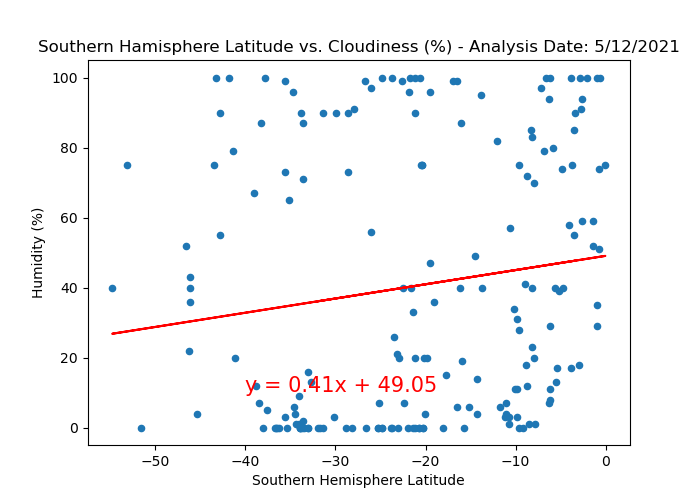

The r-squared is: 0.020945104938222877


In [64]:
# Perform a linear regression on temperature vs. latitude
from scipy import stats

# Print out the r-squared value along with the plot.
x_values = lat_south_hem_df["Lat"]
y_values = lat_south_hem_df["Cloudiness"]

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south_hem_df.plot("Lat", "Cloudiness", kind="scatter", figsize = (7,5))

#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

plt.title("Southern Hamisphere Latitude vs. Cloudiness (%) - Analysis Date: 5/12/2021")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.13


<IPython.core.display.Javascript object>


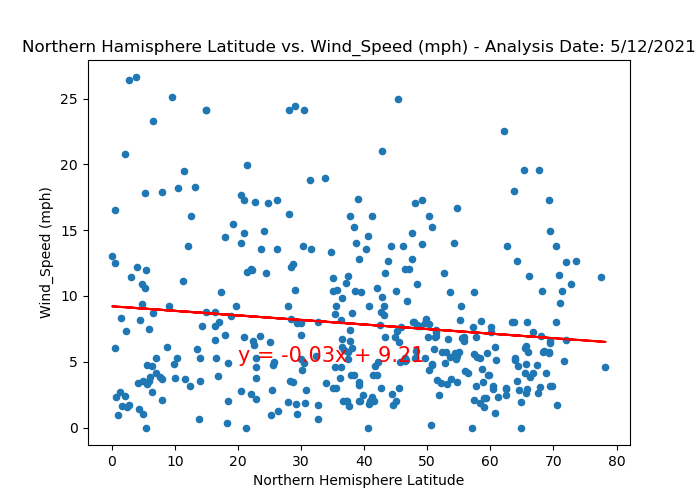

The r-squared is: 0.016453933477461383


In [65]:
# Perform a linear regression on temperature vs. latitude
from scipy import stats

# Print out the r-squared value along with the plot.
x_values = lat_north_hem_df["Lat"]
y_values = lat_north_hem_df["Wind_Speed"]

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north_hem_df.plot("Lat", "Wind_Speed", kind="scatter", figsize = (7,5))

#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

plt.title("Northern Hamisphere Latitude vs. Wind_Speed (mph) - Analysis Date: 5/12/2021")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind_Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.15


<IPython.core.display.Javascript object>


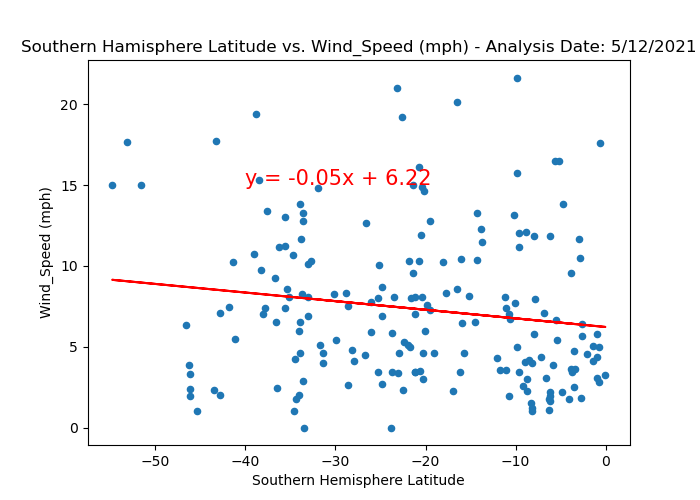

The r-squared is: 0.02344707237359839


In [66]:
# Perform a linear regression on temperature vs. latitude
from scipy import stats

# Print out the r-squared value along with the plot.
x_values = lat_south_hem_df["Lat"]
y_values = lat_south_hem_df["Wind_Speed"]

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south_hem_df.plot("Lat", "Wind_Speed", kind="scatter", figsize = (7,5))

#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")

plt.title("Southern Hamisphere Latitude vs. Wind_Speed (mph) - Analysis Date: 5/12/2021")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind_Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()